## Procesamiento de Lenguaje Natural
Taller #12: Análisis de sentimiento
Fecha de entrega: Mayo 27, 2021 (Antes del inicio de la próxima clase).

Modo de entrega: Subir link de GitHub al aula virtual.

## [25 pts] Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
Columna con el puntaje numérico del sentimiento
Pueden usar cualquiera de las librerias vistas en clase

In [185]:

# Instalamos las librearias
import pandas as pd
import numpy as np
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [181]:
# Leer las Claves para acceder al api de twiter

keys = pd.read_csv("C:/Users/usuario/Desktop/NLP/22_Febrero/llaves.csv", header=None)
keys = dict(zip(keys[0],keys[1])) #Convetir a diccionario 
keys.keys()

dict_keys(['api_key', 'api_secret_key', 'access_token', 'access_token_secret', 'bearer_token'])

In [30]:
# Autenticar a través de la API 
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [155]:
tweets = tweepy.Cursor(api.search,
                       q=['giro de italia -RT'], 
                       lang='es', 
                       geocode='4.7110,-74.0721,100km',
                       tweet_mode='extended',
                       include_rts=False,
                       ).items(100)


In [156]:
tweets ## convertir en objecto  interador a  normal es decir lista 

In [157]:
# Objecto generador
t = [tweet for tweet in tweets]

In [158]:
t[0].full_text

'Egan Bernal continua de líder tras cumplirse la etapa 14 del Giro de Italia\n\nLa fracción fue de 204 kilómetros con gran espectáculo en la alta montaña.\n\nhttps://t.co/yei27UNFRR'

In [159]:
t[0].user.location

'Ibagué, Colombia'

In [160]:
t_processed = []

for tweet in t: 
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append('Bogotá')
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/stuatus/{tweet.id}")
    
    t_processed.append(temp)

In [161]:
t_processed

[['Egan Bernal continua de líder tras cumplirse la etapa 14 del Giro de Italia\n\nLa fracción fue de 204 kilómetros con gran espectáculo en la alta montaña.\n\nhttps://t.co/yei27UNFRR',
  datetime.datetime(2021, 5, 22, 19, 47, 42),
  'Bogotá',
  'Ibagué, Colombia',
  1396191055868006401,
  'https://twitter.com/i/web/stuatus/1396191055868006401'],
 ['#DeportesRCN \n\nEl ciclista colombiano sabe que no ha ganado nada aún y debe estar concentrado. https://t.co/ecku9yQdww',
  datetime.datetime(2021, 5, 22, 19, 44, 20),
  'Bogotá',
  'Bogotá, Colombia',
  1396190208425660424,
  'https://twitter.com/i/web/stuatus/1396190208425660424'],
 ['Simon Yates se saca el sobrero al hablar de Egan Bernal: "Es el rival a batir” https://t.co/hulLT8lRqJ https://t.co/9aLam7oFaz',
  datetime.datetime(2021, 5, 22, 19, 8, 38),
  'Bogotá',
  'Bogotá, Colombia',
  1396181224733827074,
  'https://twitter.com/i/web/stuatus/1396181224733827074'],
 ['#Giro | 🎙🚴\u200d♂️💗🇨🇴 VIDEO RESUMEN de la ESPECTACULAR ACTUACIÓN 

In [162]:
## mostralo bonito    
data = pd.DataFrame(t_processed)
data.columns = ['tweets', 'date', 'city', 'user_location', 'id', 'link']
data.head()

,tweets,date,city,user_location,id,link
0,Egan Bernal continua de líder tras cumplirse l...,2021-05-22 19:47:42,Bogotá,"Ibagué, Colombia",1396191055868006401,https://twitter.com/i/web/stuatus/139619105586...
1,#DeportesRCN \n\nEl ciclista colombiano sabe q...,2021-05-22 19:44:20,Bogotá,"Bogotá, Colombia",1396190208425660424,https://twitter.com/i/web/stuatus/139619020842...
2,Simon Yates se saca el sobrero al hablar de Eg...,2021-05-22 19:08:38,Bogotá,"Bogotá, Colombia",1396181224733827074,https://twitter.com/i/web/stuatus/139618122473...
3,#Giro | 🎙🚴‍♂️💗🇨🇴 VIDEO RESUMEN de la ESPECTACU...,2021-05-22 18:40:53,Bogotá,"Bogota, Colombia",1396174240735449089,https://twitter.com/i/web/stuatus/139617424073...
4,Simon Yates avisa para la parte decisiva del G...,2021-05-22 18:35:19,Bogotá,Bogotá,1396172838890049539,https://twitter.com/i/web/stuatus/139617283889...


In [163]:
##Limpieza de datos


import re 

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'


In [164]:
def text_clean(row):
    text = row['tweets']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
    
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag, "")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention, "")
        
    return text, links, hashtags, mentions
  

In [165]:
data[['texto_limpio', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')
data

,tweets,date,city,user_location,id,link,texto_limpio,links,hashtags,mentions
0,Egan Bernal continua de líder tras cumplirse l...,2021-05-22 19:47:42,Bogotá,"Ibagué, Colombia",1396191055868006401,https://twitter.com/i/web/stuatus/139619105586...,Egan Bernal continua de líder tras cumplirse l...,[https://t.co/yei27UNFRR],[],[]
1,#DeportesRCN \n\nEl ciclista colombiano sabe q...,2021-05-22 19:44:20,Bogotá,"Bogotá, Colombia",1396190208425660424,https://twitter.com/i/web/stuatus/139619020842...,\n\nEl ciclista colombiano sabe que no ha gan...,[https://t.co/ecku9yQdww],[#DeportesRCN],[]
2,Simon Yates se saca el sobrero al hablar de Eg...,2021-05-22 19:08:38,Bogotá,"Bogotá, Colombia",1396181224733827074,https://twitter.com/i/web/stuatus/139618122473...,Simon Yates se saca el sobrero al hablar de Eg...,"[https://t.co/hulLT8lRqJ, https://t.co/9aLam7o...",[],[]
3,#Giro | 🎙🚴‍♂️💗🇨🇴 VIDEO RESUMEN de la ESPECTACU...,2021-05-22 18:40:53,Bogotá,"Bogota, Colombia",1396174240735449089,https://twitter.com/i/web/stuatus/139617424073...,| 🎙🚴‍♂️💗🇨🇴 VIDEO RESUMEN de la ESPECTACULAR A...,[https://t.co/3w7Vp3SDwD],[#Giro],[@VelonCC]
4,Simon Yates avisa para la parte decisiva del G...,2021-05-22 18:35:19,Bogotá,Bogotá,1396172838890049539,https://twitter.com/i/web/stuatus/139617283889...,Simon Yates avisa para la parte decisiva del G...,[https://t.co/cyXmDDUcF0],[],[]
...,...,...,...,...,...,...,...,...,...,...
95,Definitivamente Egan no se cansa de sacar dife...,2021-05-22 15:03:36,Bogotá,"Bogotá, D.C., Colombia",1396119558331801600,https://twitter.com/i/web/stuatus/139611955833...,Definitivamente Egan no se cansa de sacar dife...,[],[],[@Eganbernal]
96,#Giro | 🚴‍♂️🇮🇹💗 VICTORIA de Lorenzo Fortunato ...,2021-05-22 15:03:15,Bogotá,"Bogota, Colombia",1396119473653010440,https://twitter.com/i/web/stuatus/139611947365...,| 🚴‍♂️🇮🇹💗 VICTORIA de Lorenzo Fortunato (@Eol...,[https://t.co/6RuD79pNQ8],[#Giro],[]
97,"Jueputa, Egan hoy queda con medio Giro de Ital...",2021-05-22 15:02:49,Bogotá,"Bogotá, D.C.",1396119362092814341,https://twitter.com/i/web/stuatus/139611936209...,"Jueputa, Egan hoy queda con medio Giro de Ital...",[],[],[]
98,#Giro | Ganó Lorenzo Fortunato la etapa 14 del...,2021-05-22 15:02:29,Bogotá,"Bogotá, D.C., Colombia",1396119278181552129,https://twitter.com/i/web/stuatus/139611927818...,| Ganó Lorenzo Fortunato la etapa 14 del Giro...,[https://t.co/G6q2NGjsbY],"[#Giro, #EnVivo]",[]


## Asignamos el puntaje al tweet limpio, y lo guardamos en una columna 'puntaje'

In [166]:

data['puntaje']=data['texto_limpio'].apply(lambda x: vader.polarity_scores(x)['compound'])
data[['texto_limpio','puntaje']]


,texto_limpio,puntaje
0,Egan Bernal continua de líder tras cumplirse l...,0.0000
1,\n\nEl ciclista colombiano sabe que no ha gan...,-0.2584
2,Simon Yates se saca el sobrero al hablar de Eg...,0.0000
3,| 🎙🚴‍♂️💗🇨🇴 VIDEO RESUMEN de la ESPECTACULAR A...,0.3400
4,Simon Yates avisa para la parte decisiva del G...,0.0000
...,...,...
95,Definitivamente Egan no se cansa de sacar dife...,-0.5983
96,| 🚴‍♂️🇮🇹💗 VICTORIA de Lorenzo Fortunato (@Eol...,0.8957
97,"Jueputa, Egan hoy queda con medio Giro de Ital...",0.0000
98,| Ganó Lorenzo Fortunato la etapa 14 del Giro...,0.0000


## [10 pts] Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [167]:
data[['texto_limpio','puntaje']].max()

texto_limpio    🙌 ¡Impresionante! El colombiano Egan Bernal co...
puntaje                                                    0.9441
dtype: object

In [168]:
data[['texto_limpio','puntaje']].min()


texto_limpio    \nEl colombiano terminó cuarto en la etapa 14 ...
puntaje                                                   -0.6588
dtype: object

## [10 pts] Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [169]:

positivos = 0
negativos = 0
neutros   = 0

for tw in data[['puntaje']].values:
    if tw > 0 :
        positivos=positivos +1
    elif tw < 0 : 
        negativos=negativos+1
    else :
        neutros = neutros +1
        
print("Tweets Positivos: {}".format(positivos))
print("Tweets Negativos: {}".format(negativos))
print("Tweets Neutros: {}".format(neutros))

Tweets Positivos: 14
Tweets Negativos: 6
Tweets Neutros: 80


In [170]:
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(data)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

## [5 pts] : Punto 4: Una visualización sobre sus datos

## Series de tiempo

In [171]:
data['hora'] = data['date'].dt.floor('T').dt.time ##Lista larga 
temp = pd.DataFrame(data.hora.value_counts()).reset_index() ## para que no quede en indice sino en columna 
temp.columns = ['hora', 'cnt']
temp = temp.sort_values('hora')
temp

,hora,cnt
2,15:02:00,3
1,15:03:00,3
7,15:04:00,2
20,15:05:00,1
38,15:06:00,1
...,...,...
16,18:35:00,2
57,18:40:00,1
22,19:08:00,1
30,19:44:00,1


In [172]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [174]:
trace = go.Scatter(x=temp.hora.values,
                   y=temp.cnt.values,
                   text=[f"Fecha: {f}<br>Tuits: {c}" for f,c in zip(temp.hora.values,temp.cnt.values)],
                   hoverinfo='text',
                   mode='lines+markers',
                   name='Horas',
                   line={'color': 'green'})

layout = go.Layout(title="Número de tuits por hora")

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Nube de palabras

In [175]:
# Importamos las librerias
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords

stopwords = stopwords.words('spanish')

In [176]:
P_positivos = data.loc[:, 'puntaje'] > 0
N_negativos = data.loc[:, 'puntaje'] < 0
NE_neutros =  data.loc[:, 'puntaje'] == 0

df_positivos = data.loc[P_positivos]
df_negativos = data.loc[N_negativos]
df_neutros = data.loc[NE_neutros]

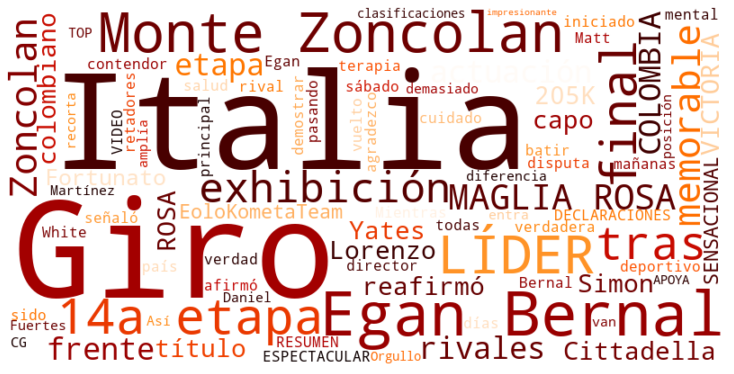

In [177]:

palabras=df_positivos.texto_limpio.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,                
                      max_font_size=150, max_words=250,
                      background_color='white', colormap='gist_heat',
                      stopwords=stopwords).generate(palabras)
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

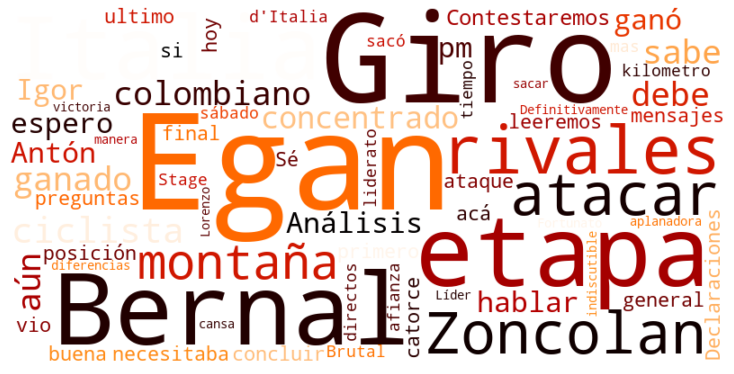

In [178]:

palabras=df_negativos.texto_limpio.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,                
                      max_font_size=150, max_words=250,
                      background_color='white', colormap='gist_heat',
                      stopwords=stopwords).generate(palabras) 
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

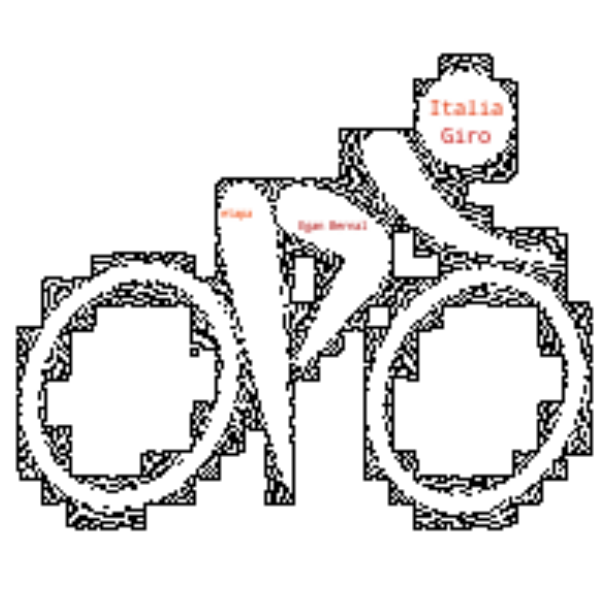

In [212]:
img_2 = PIL.Image.open("C:/Users/usuario/Desktop/NLP/22_Febrero/cicla_1.png")
mask_2 = np.array(img_2)
palabras = data.texto_limpio.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=180, max_words=300,
                      background_color="white", colormap='gist_heat',
                      stopwords=stopwords,
                      mask=mask_2, contour_width=0.5, contour_color='black').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("profesor_super_o.png")
plt.figure(figsize=(30,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
